In [9]:
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#pandas and matplotlib warning
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [10]:
#getting data
disease_type = 'ILI'
year_range='2017-2020'
path_to_data = 'data/NYC_'+disease_type+'_'+year_range+'.csv'
df = pd.read_csv(path_to_data,infer_datetime_format=True,encoding='latin')
df.head()

,Data note 1,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count
0,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,12/25/2016,110
1,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,12/26/2016,150
2,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,12/27/2016,159
3,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,12/28/2016,130
4,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Borough,Bronx,Age Group,All age groups,12/29/2016,141


In [11]:
#getting 2020 data
df['Date'] = pd.to_datetime(df['Date'],infer_datetime_format=True)
df = df[(df['Date']>='2020-01-01')] #df is 2020 data
df["Count"] = pd.to_numeric(df['Count'].str.replace(",",""))
# add day of week
df['Day of Week'] = df['Date'].dt.weekday
df = df.reset_index(drop=True)
#only consider citywide, all age groups
df = df[(df['Dim1Value']=='Citywide')&(df['Dim2Value']=='All age groups')]

In [12]:
print(df.shape)
df.head()

(83, 9)


,Data note 1,Ind1Name,Dim1Name,Dim1Value,Dim2Name,Dim2Value,Date,Count,Day of Week
2490,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Citywide,Citywide,Age Group,All age groups,2020-01-01,884,2
2491,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Citywide,Citywide,Age Group,All age groups,2020-01-02,941,3
2492,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Citywide,Citywide,Age Group,All age groups,2020-01-03,895,4
2493,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Citywide,Citywide,Age Group,All age groups,2020-01-04,887,5
2494,-Syndrome data are inherently non-specific and...,Influenza-like illness (ILI),Citywide,Citywide,Age Group,All age groups,2020-01-05,836,6


In [13]:
#loading baselines from data folder
baseline_path = "data/baseline_percentiles_2017-2019_mostrecent2wks_"+disease_type+".pkl"
baseline = pd.read_pickle(baseline_path)
baseline.head()

0.5,mean,20%,80%
Day of Week,,,
0,308.5,263.0,318.0
1,284.5,254.0,321.0
2,272.0,209.0,317.0
3,230.0,227.6,286.4
4,278.0,226.6,282.4


In [14]:
#notice this is an inplace operation
def subtract_baseline(data:pd.DataFrame,baseline:pd.DataFrame,percentile_key:str):
    #percentile key is the column name in baseline used to subtract off data 
    #a terribly inefficient implementation
    normalized_count = []
    for index, row in df.iterrows():
        normalized_count.append(row['Count'] - baseline.loc[int(row['Day of Week']),percentile_key])
    data['Normalized Count '+percentile_key+' baseline'] = normalized_count
    return data

In [18]:
new_df = subtract_baseline(df,baseline, "mean")
new_df = subtract_baseline(df,baseline, "20%")
new_df = subtract_baseline(df,baseline, "80%")

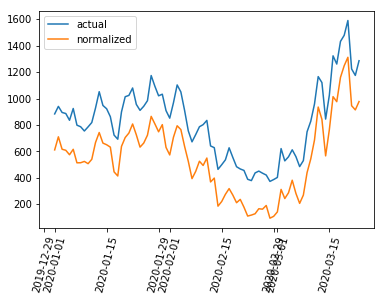

In [16]:
plt.plot(new_df['Date'],new_df['Count'],label='actual')
plt.plot(new_df['Date'],new_df['Normalized Count mean baseline'],label='normalized')
plt.legend()
plt.xticks(rotation=75);

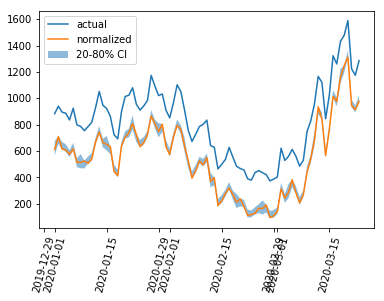

In [25]:
plt.plot(new_df['Date'],new_df['Count'],label='actual')
plt.plot(new_df['Date'],new_df['Normalized Count mean baseline'],label='normalized')
plt.fill_between(new_df['Date'],y1=new_df['Normalized Count 80% baseline'],y2=new_df['Normalized Count 20% baseline'],label='20-80% CI',alpha=0.5)
plt.legend()
plt.xticks(rotation=75);